# Assignment 1

## Group 32

*  Prerak Gupta -
*  Chen Zhiyue -
*  Jonathan Narvaez - 03708467
*  Hao Ma - 03721529
*  Zhen Zhou - 03721400

In [ ]:
import numpy as np

## Curse of Dimensionality

### Task 1

Let $\mathit{C}_d = \{\mathit{x}\in \mathbb{R}^p\mid\|\mathit{x}\|_\infty\leq\frac{d}{2}\}$ denote the $\mathit{p}$-dimensional hypercube of edge length $\mathit{d}$, centered at the orign.

* Assume $\mathit{X}$ to be uniformly distributed in $\mathit{C}_1$. Determine $\mathit{d}$ in dependence of $\mathit{p}$ and $\mathit{q}\in[0, 1]$, such that
$$Pr(\mathit{X}\in\mathit{C}_d)=q$$
holds.

* Let the components of the $\mathit{p}$-dimensional random variable $\mathit{X}^p$ be independent and have the standard normal distribution. It is known that $Pr(|\mathit{X}^1|\leq2.576)=0.99$. For an arbitrary $\mathit{p}$, determine the probability $Pr(\|\mathit{X}^p\|_\infty\gt2.576)$ for any of the components of $\mathit{X}^p$ to lie outside of the interval $[-2.576, 2.576]$. Evaluate the value for $\mathit{p} = 2$, $\mathit{p} = 3$ and $\mathit{p} = 500$.

Solution:
$$
\begin{align*}
& Pr(|\mathbf{X}^1| \leq 2.576) = 0.99 &\\
& Pr(\|\mathbf{X}^p\| \leq 2.576) = (0.99)^p & \\
& \Rightarrow \quad \,\; Pr(\|\mathbf{X}^p\|_\infty\gt2.576) = 1 - (0.99)^p &
\end{align*}
$$

$$
\begin{align*}
& \text{ when p = 2 }  , Pr(\|\mathbf{X}^2\|_\infty\gt2.576) = 1 - (0.99)^2 \approx 0.0199 \\
& \text{ when p = 3 }  , Pr(\|\mathbf{X}^3\|_\infty\gt2.576) = 1 - (0.99)^3 \approx 0.0297 \\
& \text{ when p = 500 }, Pr(\|\mathbf{X}^{500}\|_\infty\gt2.576) = 1 - (0.99)^{500} \approx 0.9934 \\
\end{align*}
$$


### Task 2

Provide the PYTHON code to the following tasks (the code needs to be commented properly):

* Sample 100 uniformly distributed random vectors from the box  $[-1, 1]^{d}$ for $\mathit{d} = 2$.

Text(0.5, 1.0, 'Uniformlydistributed random vectors from $[-1, 1]^2$')

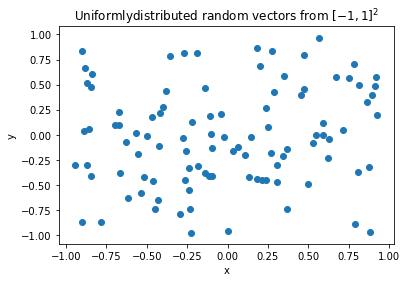

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

d = 2
n = 100

vector = 2*np.random.random((n, d)) - 1

plt.scatter(vector[:, 0], vector[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniformlydistributed random vectors from $[-1, 1]^2$')

* For each of the 100 vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors
$\mathit{x}, \mathit{y}$ the cosine of the angle between the two vectors is defined as
$$\cos{((\mathit{x}, \mathit{y}))} = \frac{\langle \mathit{x}, \mathit{y} \rangle}{\|\mathit{x}\|\|\mathit{y}\|}.$$

In [2]:
def angle(x, y):
    if np.sqrt(np.dot(x,x)) ==0 or np.sqrt(np.dot(y,y)) ==0:
        return error
      
    #the result of angle
    angle = np.arccos(np.dot(x, y) / (np.sqrt(x.dot(x)) * np.sqrt(y.dot(y))))
    return angle

def avg_min_angle(x):
     angle_min = np.zeros(x.shape[0])
    
    # calculate angular distance to nearest neighbor of vector 
     for i, a in enumerate(x):
            angle_min[i] = min([angle(a, b)  for j, b in enumerate(x) if j!=i])
    
     return np.average(angle_min)

avg_angle = avg_min_angle(vector)
print('The average of these minimum angles: {}'.format(avg_angle))

The average of these minimum angles: 0.030493025377827193


* Repeat the above for dimensions $\mathit{d} = 1, ..., 1000$ and use the results to plot the average minimum angle against the dimension.

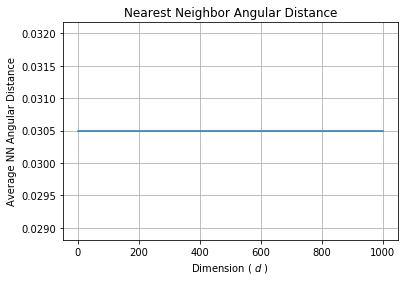

In [3]:
def ds_angle(dimensions, n=100):
    
      return list(map(lambda d: avg_min_angle(vector), dimensions))


dimensions = np.arange(1, 1001)

avg_angles = ds_angle(dimensions)


# plot avg and std of nearest neighbor angular distances
plt.plot(dimensions, avg_angles)
plt.xlabel('Dimension ( $d$ )')
plt.ylabel('Average NN Angular Distance')
plt.title('Nearest Neighbor Angular Distance')
#plt.legend(['$\mu$', '$\sigma$'])
plt.grid()

* Give an interpretation of the result. What conclusions can you draw for 2 randomly sampled vectors in a $\mathit{d}$-dimensional space?

* Does the result change if the sample size increases?

## Statistical Decision Making

### Task 3

Answer the following questions. All answers must be justified.

* The numbers in Figure 1 show the probability of the respective event to happen (e.g. the probability for the event $\mathit{X} = 1$ and $\mathit{Y} = 1$ is 0.02). Is this table a
probability table? If so, why?

* Based on Figure 1 give the conditional expectation $\mathbb{E}_{Y \mid X=2}[\mathit{Y}]$ and the probability of the event $\mathit{X}=1$ under the condition that $\mathit{Y}=3$.

* Is the function $\mathit{p}(\mathit{X}, \mathit{Y})$ given by
$$
\mathit{p}(\mathit{X}, \mathit{Y}) = \begin{cases}
1 & \quad \text{for } 0\leq \mathit{x}\leq 1\text{, } 0\leq \mathit{y}\leq \frac{1}{2} \\
0 & \quad \text{otherwise} \end{cases}
$$
a joint density function for two random variables?

* For two random variables $\mathit{X}$ and $\mathit{Y}$ the joint density function is given by
$$
\mathit{p}(\mathit{x}, \mathit{y}) = \begin{cases}
2\mathit{e}^{-(x+y)} & \quad \text{for } 0\leq \mathit{x}\leq \mathit{y}\text{, } 0\leq \mathit{y} \\
0 & \quad \text{otherwise.} \end{cases}
$$
What are the marginal density functions for $\mathit{X}$ and $\mathit{Y}$ respectively?

* Let the joint density function of two random variables $\mathit{X}$ and $\mathit{Y}$ be given by
$$
\mathit{p}(\mathit{x}, \mathit{y}) = \begin{cases}
\frac{1}{15}(2\mathit{x}+4\mathit{y}) & \quad \text{for } 0\leq \mathit{x}\leq 3\text{, } 0\leq \mathit{y}\leq 1 \\
0 & \quad \text{otherwise.} \end{cases}
$$
Determine the probability for $\mathit{X}\leq 2$ under the condition that $\mathit{Y} = \frac{1}{2}$.

### Task 4

Show that the covariance matrix $\mathit{C}$ of any random variable $\mathit{X}\in\mathbb{R}^p$ is symmetric positive semidefinite, i.e. $\mathit{C}=\mathit{C}^T$ and $\mathit{x}^T\mathit{Cx}\geq 0$ for any covariance matrix $\mathit{C}\in\mathbb{R}^{p\times p}$ and any $\mathit{x}\in\mathbb{R}^p$.

Solution:

First we prove that $\mathbf{C}=\mathbf{C}^T$:
$$
\begin{align*}
& \because \quad \,\; \mathbf{C} = \mathbb{E}((\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T) \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}((\mathbf{X}-\mathbf{\mu})(\mathbf{X}^T-\mathbf{\mu}^T)) \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T-\mathbf{X\mu}^T-\mathbf{\mu X}^T+\mathbf{\mu\mu}^T) \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T)-\mathbb{E}(\mathbf{X\mu}^T)-\mathbb{E}(\mathbf{\mu X}^T)+\mathbb{E}(\mathbf{\mu\mu}^T) \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T)-\mathbb{E}(\mathbf{X})\mathbf{\mu}^T-\mathbf{\mu}\mathbb{E}(\mathbf{X}^T)+\mathbf{\mu\mu}^T \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T)-\mathbf{\mu\mu}^T-\mathbf{\mu\mu}^T+\mathbf{\mu\mu}^T \\
& \Rightarrow \quad \mathbf{C} = \mathbb{E}(\mathbf{XX}^T)-\mathbf{\mu\mu}^T \\
& \Rightarrow \quad \mathbf{C}^T = \mathbb{E}(\mathbf{XX}^T)^T-(\mathbf{\mu\mu}^T)^T \\
& \Rightarrow \quad \mathbf{C}^T = \mathbb{E}((\mathbf{XX}^T)^T)-(\mathbf{\mu\mu}^T)^T \\
& \Rightarrow \quad \mathbf{C}^T = \mathbb{E}((\mathbf{X}^T)^T(\mathbf{X})^T)-(\mathbf{\mu}^T)^T(\mathbf{\mu})^T \\
& \Rightarrow \quad \mathbf{C}^T = \mathbb{E}(\mathbf{X}\mathbf{X}^T)-\mathbf{\mu}\mathbf{\mu}^T \\
& \therefore \quad \,\; \mathbf{C}^T = \mathbf{C} \\
\end{align*}
$$
Next, we prove that $\mathbf{x}^T\mathbf{Cx}\geq 0$:
$$
\begin{align*}
& \because \quad \,\; \mathbf{C} = \mathbb{E}((\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T) \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbf{x}^T\mathbb{E}((\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T)\mathbf{x} \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbb{E}(\mathbf{x}^T(\mathbf{X}-\mathbf{\mu})(\mathbf{X}-\mathbf{\mu})^T\mathbf{x}) \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbb{E}((\mathbf{x}^T(\mathbf{X}-\mathbf{\mu}))(\mathbf{x}^T(\mathbf{X}-\mathbf{\mu}))^T) \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbb{E}(YY^T) \\
& \Rightarrow \quad \mathbf{x}^T\mathbf{Cx} = \mathbb{E}(Y^2) \\
& \therefore \quad \mathbf{x}^T\mathbf{Cx} \geq 0
\end{align*}
$$